# Full time series visualizer code

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📅 Generate Synthetic Dataset
np.random.seed(42)
dates = pd.date_range(start='2016-05-09', end='2019-12-03', freq='D')
trend = np.linspace(20000, 35000, len(dates))
seasonality = 3000 * np.sin(2 * np.pi * dates.dayofyear / 365.25)
noise = np.random.normal(0, 1500, len(dates))
views = (trend + seasonality + noise).astype(int)
views = np.clip(views, 5000, None)

df = pd.DataFrame({'date': dates, 'value': views})
df.to_csv('fcc-forum-pageviews.csv', index=False)

# 📊 Load and clean
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

# ✅ Line Plot
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    fig.tight_layout()
    fig.savefig('line_plot.png')
    return fig

# ✅ Bar Plot
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    month_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    df_grouped = df_grouped[month_order]

    fig = df_grouped.plot(kind='bar', figsize=(15, 8)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    plt.tight_layout()
    fig.savefig('bar_plot.png')
    return fig

# ✅ Box Plot
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    fig.tight_layout()
    fig.savefig('box_plot.png')
    return fig


# LINE PLOT

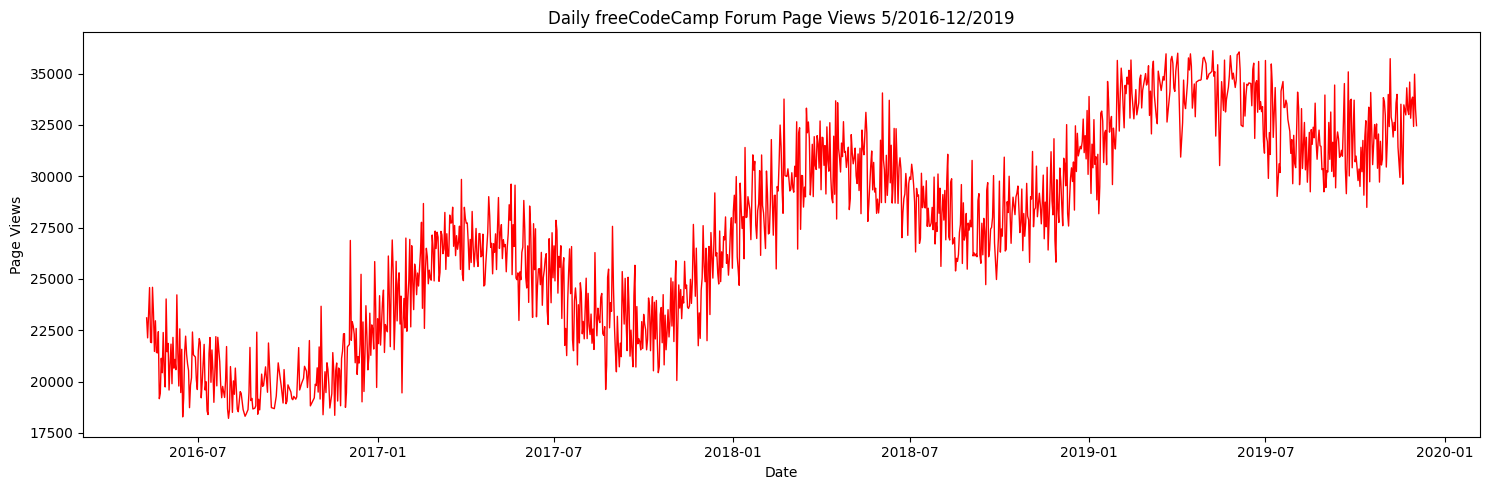

In [20]:
fig = draw_line_plot()
plt.show()


# BAR PLOT

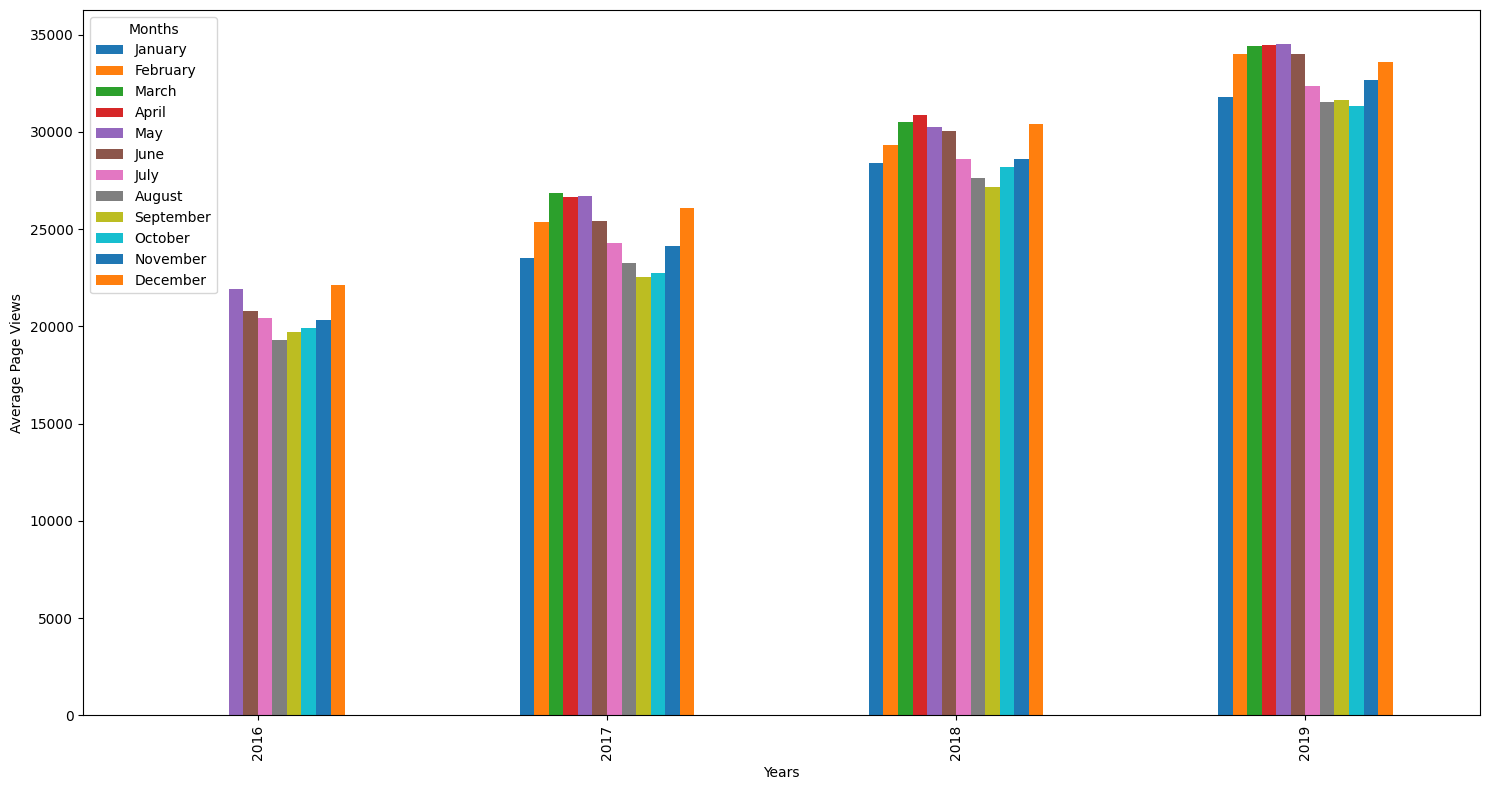

In [21]:
fig = draw_bar_plot()
plt.show()


# BOX PLOT

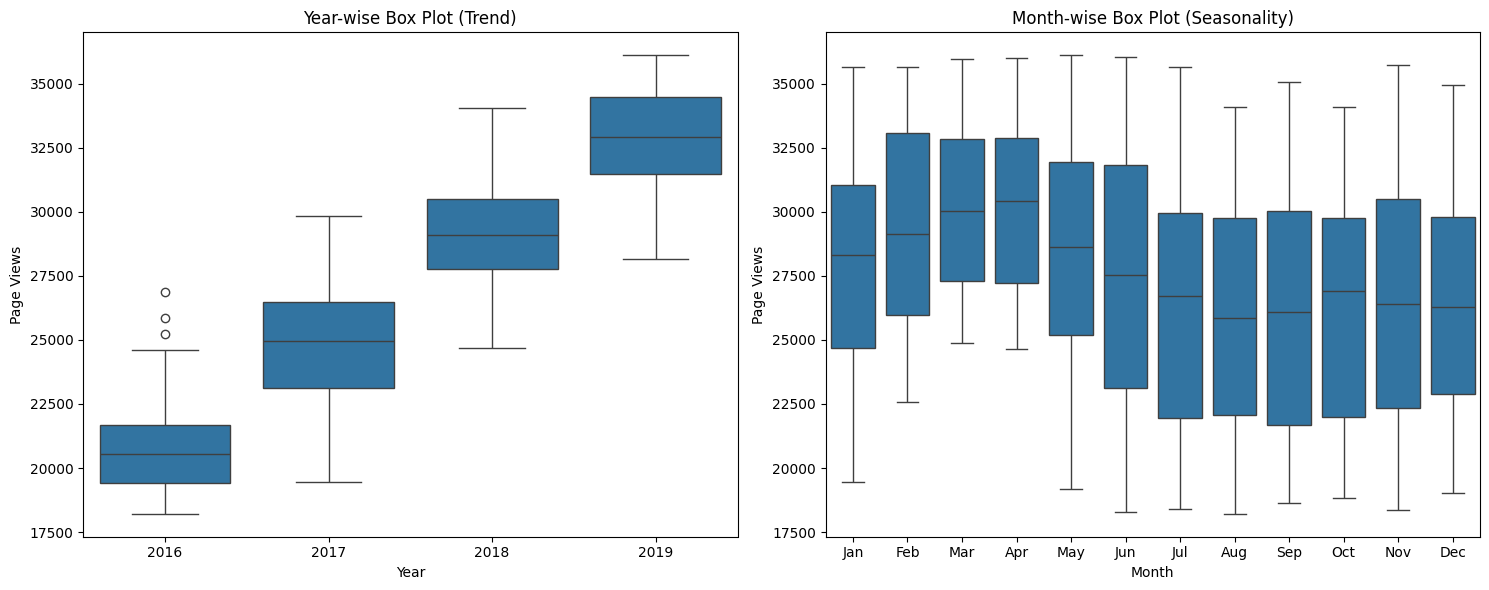

In [23]:
fig = draw_box_plot()
plt.show()


# 🧾 Conclusion & Recommendation
This time series analysis of freeCodeCamp forum page views from 2016 to 2019 reveals clear seasonal trends and overall growth in user engagement. The line plot shows steady upward activity over time, while the bar and box plots expose consistent monthly patterns and increased yearly usage.

# 📌 Key Insights:
Forum traffic increased significantly between 2016 and 2019, suggesting growing community participation.

Page views peak consistently in early and late months of the year, possibly reflecting New Year learning goals and end-of-year wrap-ups.

Monthly variability highlights seasonal user behaviors that can be leveraged for targeted content releases or community events.


# ✅ Recommendation:
freeCodeCamp may consider aligning major content updates, campaigns, or challenges with periods of high engagement (e.g., January and October–December) to maximize impact. Further investigation into external factors driving these patterns could optimize platform growth strategies.